# Laboratorio 2
### Data science - Lynette Garcia
Daniel Gomez 21429
Abner Garcia 21285

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
import pandas as pd

# Cargar los datos
combu = pd.read_csv('gas.csv', parse_dates=['Fecha'], index_col='Fecha', date_format='%b/%Y')

# Generar la columna 'Diesel' combinando 'Diesel bajo azufre' y 'Diesel ultra bajo azufre'
combu['Diesel'] = combu['Diesel bajo azufre'].fillna(0) + combu['Diesel ultra bajo azufre'].fillna(0)

# Primero, eliminamos cualquier carácter no numérico o espacios en blanco
combu['Gasolina regular'] = combu['Gasolina regular'].str.replace(',', '').str.strip()
combu['Gasolina superior'] = combu['Gasolina superior'].str.replace(',', '').str.strip()
combu['Diesel'] = combu['Diesel'].str.replace(',', '').str.strip()
combu['Gas licuado de petróleo'] = combu['Gas licuado de petróleo'].str.replace(',', '').str.strip()

# Luego, convertimos las columnas a float
combu['Gasolina regular'] = pd.to_numeric(combu['Gasolina regular'], errors='coerce')
combu['Gasolina superior'] = pd.to_numeric(combu['Gasolina superior'], errors='coerce')
combu['Diesel'] = pd.to_numeric(combu['Diesel'], errors='coerce')
combu['Gas licuado de petróleo'] = pd.to_numeric(combu['Gas licuado de petróleo'], errors='coerce')

# Obtener solo las columnas necesarias
gas = combu[['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']]

# Verificamos la conversión
print(gas.info())


<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, ene/2001 to Nota: Información sujeta a actualización por presentación extemporánea y rectificacion de informes mensuales, por parte de los sujetos obligados.
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina regular         281 non-null    float64
 1   Gasolina superior        280 non-null    float64
 2   Diesel                   213 non-null    float64
 3   Gas licuado de petróleo  280 non-null    float64
dtypes: float64(4)
memory usage: 11.1+ KB
None


In [13]:
gas.head()

,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
Fecha,,,,
ene/2001,177.77650,373.96396,0.0,194.06574
feb/2001,123.11599,243.09107,0.0,170.70338
mar/2001,161.72642,312.08438,0.0,161.83737
abr/2001,127.33874,285.05489,0.0,163.04864
may/2001,168.73019,300.91367,0.0,171.51886


In [14]:
gas.describe()

,Gasolina regular,Gasolina superior,Diesel,Gas licuado de petróleo
count,281.000000,280.000000,213.000000,280.000000
mean,401.433017,482.724339,34.549146,406.740007
std,234.159202,147.715277,165.401636,193.604735
min,81.015300,170.292500,0.000000,100.561470
25%,205.624080,366.579162,0.000000,224.162995
50%,320.566690,468.928555,0.000000,409.500015
75%,548.714530,593.206262,0.000000,562.579840
max,987.872050,947.226270,896.539240,960.840530


In [15]:
analysis = ProfileReport(gas)
analysis.to_file('gas_analysis.html')

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 113.00it/s]


In [16]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, ene/2001 to Nota: Información sujeta a actualización por presentación extemporánea y rectificacion de informes mensuales, por parte de los sujetos obligados.
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gasolina regular         281 non-null    float64
 1   Gasolina superior        280 non-null    float64
 2   Diesel                   213 non-null    float64
 3   Gas licuado de petróleo  280 non-null    float64
dtypes: float64(4)
memory usage: 19.2+ KB


### Consumo mensual de gas


Consumo Mensual:
       Gasolina regular  Gasolina superior  Diesel  Gas licuado de petróleo
Fecha                                                                      
NaT           177.77650          373.96396     0.0                194.06574
NaT           123.11599          243.09107     0.0                170.70338
NaT           161.72642          312.08438     0.0                161.83737
NaT           127.33874          285.05489     0.0                163.04864
NaT           168.73019          300.91367     0.0                171.51886


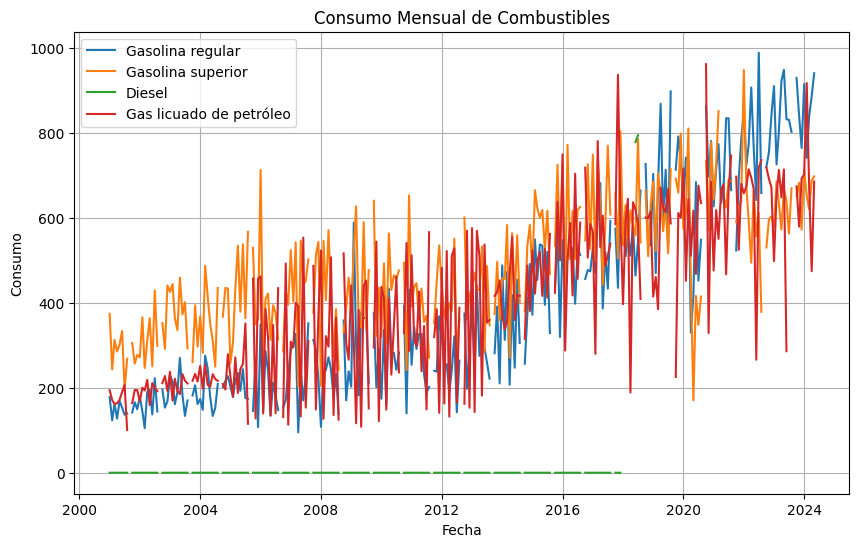

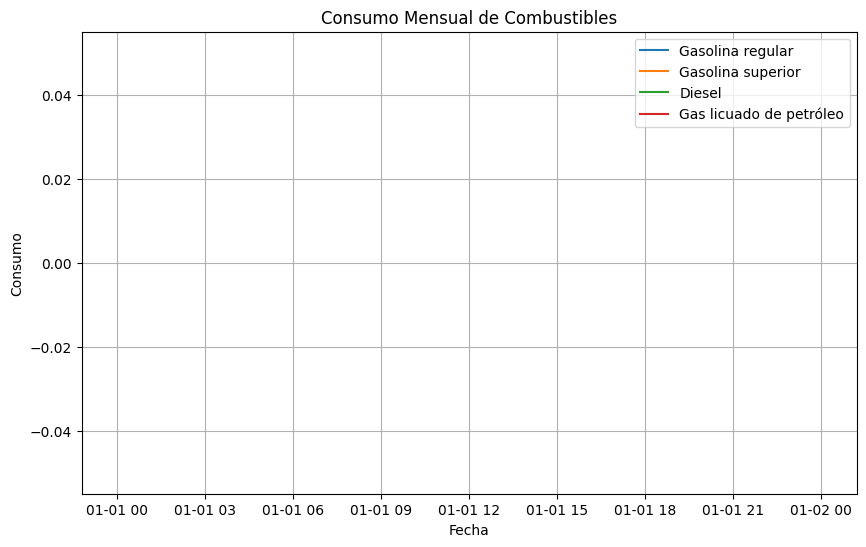

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Supongamos que 'combu' es tu DataFrame y 'gas' es la lista de columnas de interés
gas = ['Gasolina regular', 'Gasolina superior', 'Diesel', 'Gas licuado de petróleo']

# Asegurarse de que las columnas sean de tipo 'object' (cadena de texto)
for column in gas:
    combu[column] = combu[column].astype(str)

# Eliminar cualquier carácter no numérico o espacios en blanco
for column in gas:
    combu[column] = combu[column].str.replace(',', '').str.strip()

# Convertir las columnas a float
for column in gas:
    combu[column] = pd.to_numeric(combu[column], errors='coerce')

# Diccionario para traducir los meses en español a inglés
meses_espanol = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'sept': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Función para traducir las fechas
def traducir_fecha(fecha):
    if isinstance(fecha, str):
        for mes_es, mes_en in meses_espanol.items():
            fecha = fecha.replace(mes_es, mes_en)
    return fecha

# Asegurarse de que el índice sea de tipo 'object' (cadena de texto)
combu.index = combu.index.astype(str)

# Traducir las fechas en el índice
combu.index = combu.index.map(traducir_fecha)

# Asegurarse de que el índice sea de tipo datetime con el formato correcto
if not pd.api.types.is_datetime64_any_dtype(combu.index):
    combu.index = pd.to_datetime(combu.index, format='%b/%Y', errors='coerce')

# Filtrar las series de interés
consumo = combu[gas]

print('\nConsumo Mensual:')
print(consumo.head())

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
for column in gas:
    plt.plot(consumo.index, consumo[column], label=column)

plt.title('Consumo Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()